# Breast Cancer Classification: Coimbra Data Set
This dataset is from the UCI Machine Learning repository. Data was collected from 64 patients with breast cancer and 52 healthy controls. There are 10 predictive features, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer. The predictors are anthropometric data and parameters which can be gathered in routine blood analysis. Prediction models based on these features can potentially be used as a biomarker of breast cancer.

Predictive Features: Age (years), BMI (kg/m^2), Glucose (mg/dL) , Insulin (µU/mL), HOMA , Leptin (ng/mL) , Adiponectin (µg/mL) , Resistin (ng/mL), MCP-1(pg/dL)

Classification Labels: 1 = Healthy control, 2 = Cancer patient

Dataset: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lmfit import Model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import umap
from tpot import TPOTClassifier

pl.style.use('seaborn')
pl.rc('font',family='Arial')

## 1. Read in data and explore

In [18]:
data = pd.read_csv("dataR2.csv")
X = data.drop(['Classification'],axis=1)
Y = data['Classification']

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


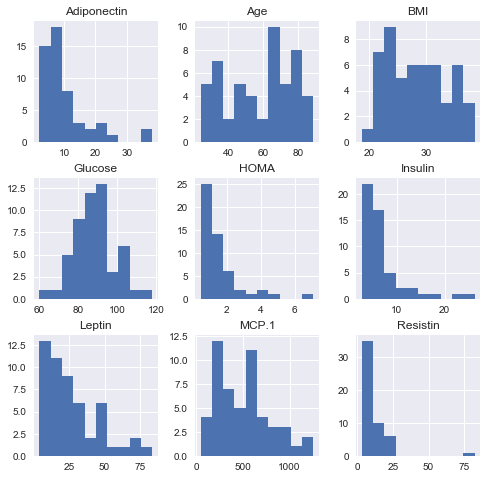

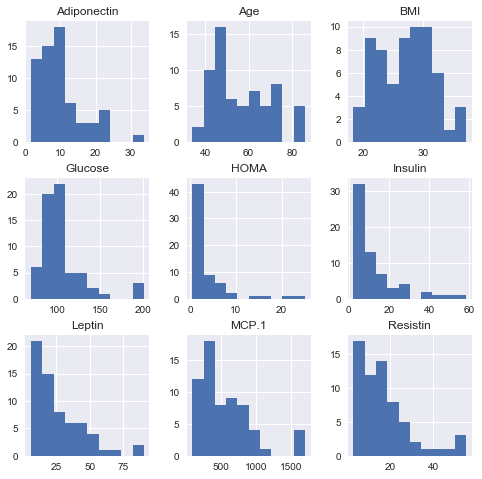

In [6]:
data.groupby('Classification').hist(figsize=(8, 8))
pl.show()

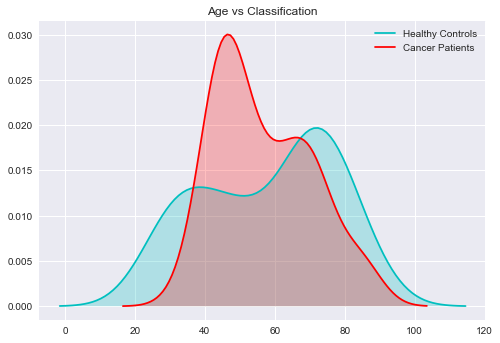

In [20]:
sns.kdeplot(data.Age[data.Classification == 1],color="c",shade=True)
sns.kdeplot(data.Age[data.Classification == 2],color="r",shade=True)
pl.legend(['Healthy Controls', 'Cancer Patients'])
pl.title('Age vs Classification')
pl.show()

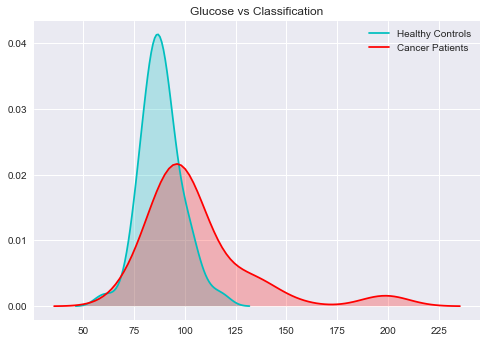

In [21]:
sns.kdeplot(data.Glucose[data.Classification == 1],color="c",shade=True)
sns.kdeplot(data.Glucose[data.Classification == 2],color="r",shade=True)
pl.legend(['Healthy Controls', 'Cancer Patients'])
pl.title('Glucose vs Classification')
pl.show()

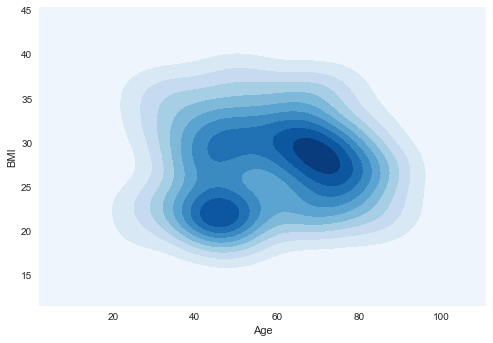

In [95]:
sns.kdeplot(data['Age'],data['BMI'],shade = True, cmap = 'Blues')
pl.show()

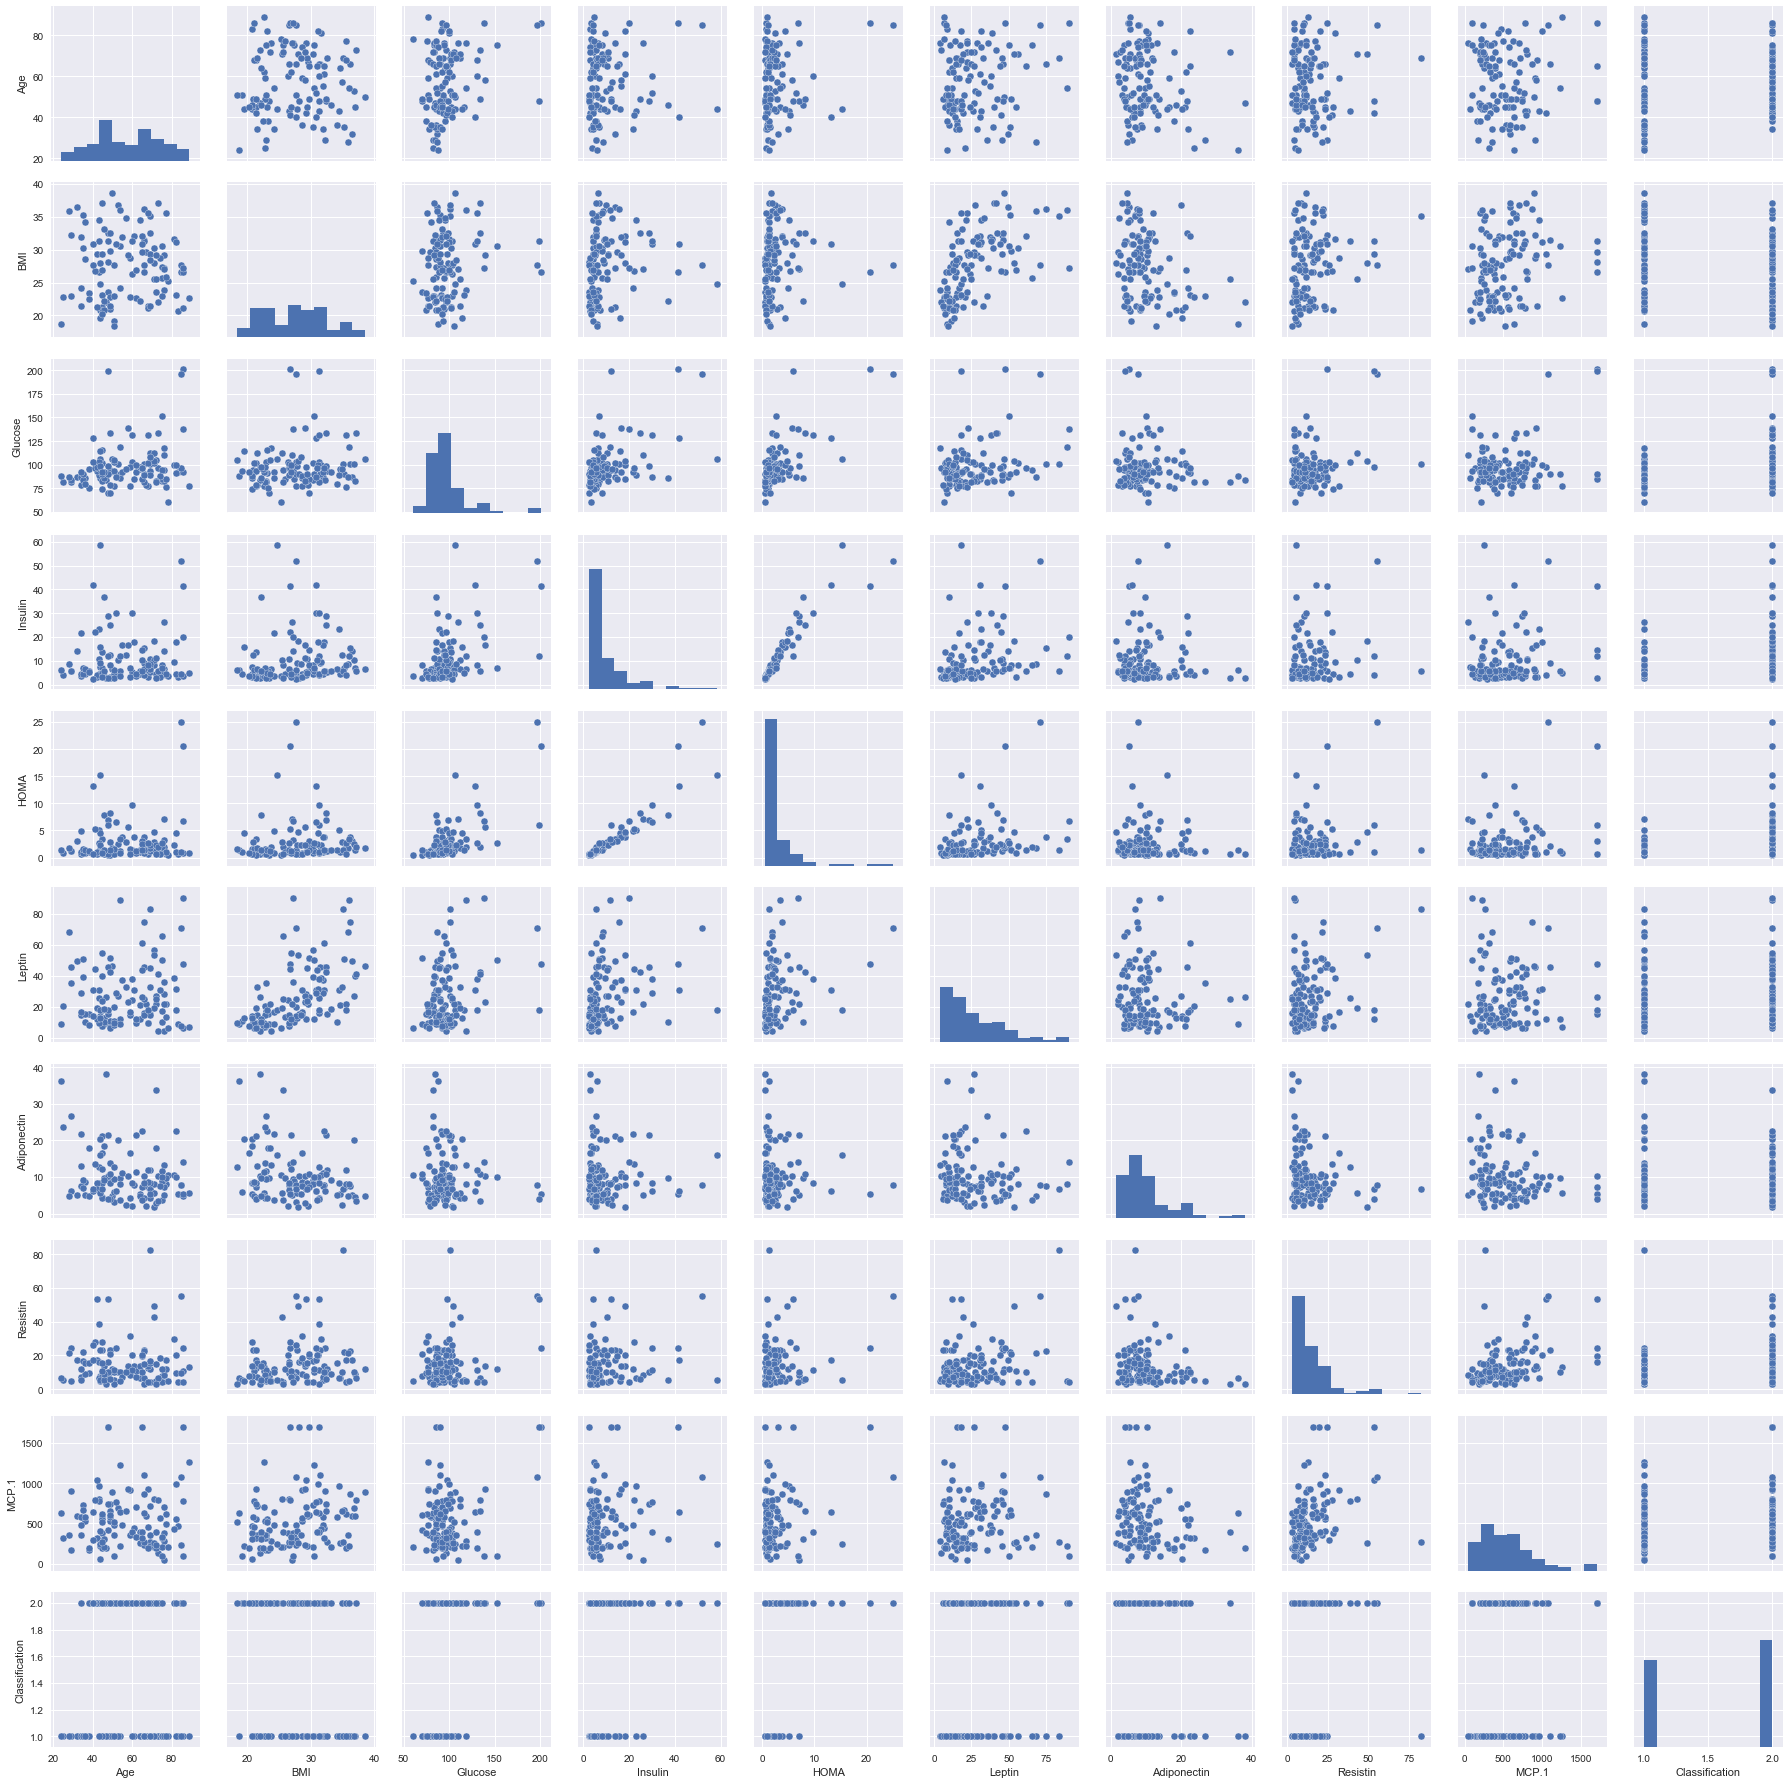

In [96]:
sns.pairplot(data)
pl.show()

## 2. Feature analysis

### Look at correlations between features
Note correlations between HOMA and Insulin, HOMA and Glucose, BMI and Leptin, Insulin and Glucose. Glucose has highest correlation with Classification

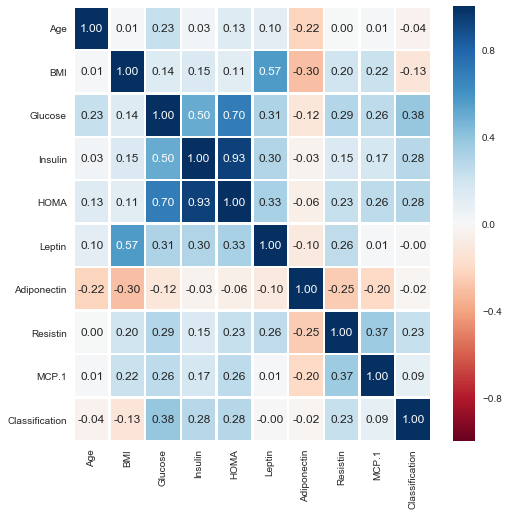

In [29]:
cor = data.corr()
pl.figure(figsize = (8,8))
sns.heatmap(cor,annot = True,fmt = '.2f',linewidths = 1.5, cmap = 'RdBu')
pl.show()

### Principle Component Analysis
No apparent clustering

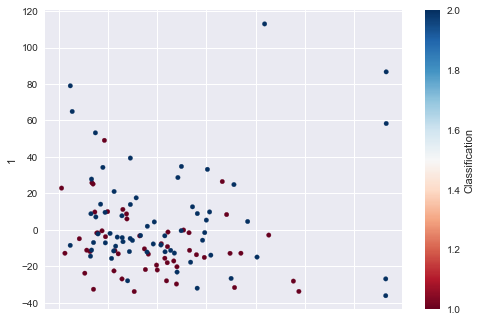

In [27]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)
X_pca.plot.scatter(x=0,y=1,c='Classification',colormap='RdBu')
pl.show()

## 3. Generate and test classification models 

### Split data into train and test set

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

### Scale the data

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic regression model

train score: 0.735632183908046
test score:  0.8620689655172413


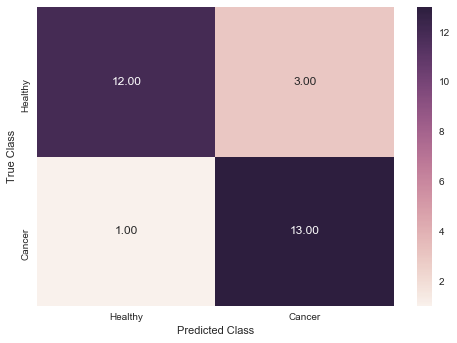

In [50]:
logistic_model = LogisticRegression(random_state = 10)
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_test)

print('train score: '+str(logistic_model.score(X_train,Y_train)))
print('test score:  '+str(logistic_model.score(X_test,Y_test)))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

### K-nearest neighbors model

train score: 0.8160919540229885
test score:  0.7931034482758621


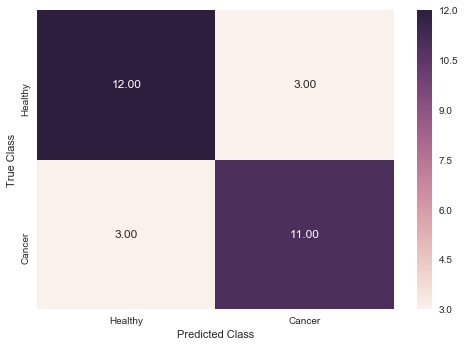

In [15]:
kn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
kn_model.fit(X_train, Y_train)
Y_pred = kn_model.predict(X_test)

print('train score: '+str(kn_model.score(X_train,Y_train)))
print('test score:  '+str(kn_model.score(X_test,Y_test)))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

### Linear SVM model

train score: 0.7586206896551724
test score:  0.8620689655172413


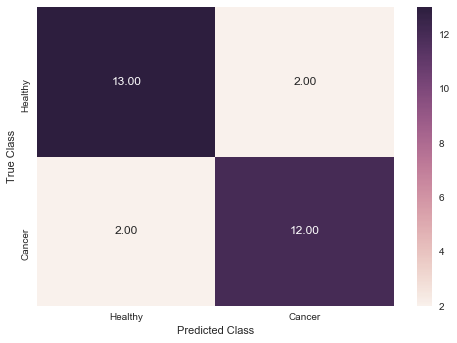

In [52]:
lsvc_model = SVC(kernel = 'linear', random_state = 10)
lsvc_model.fit(X_train, Y_train) 
Y_pred = lsvc_model.predict(X_test)

print('train score: '+str(lsvc_model.score(X_train,Y_train)))
print('test score:  '+str(lsvc_model.score(X_test,Y_test)))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

### Radial basis function SVM

train score: 0.8620689655172413
test score:  0.8275862068965517


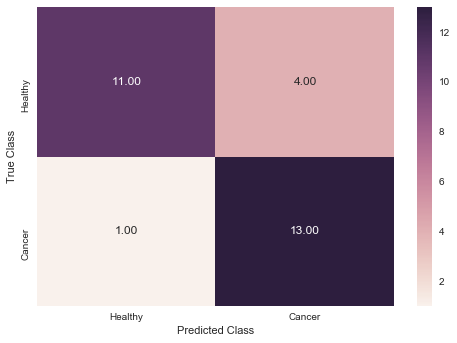

In [53]:
rsvc_model = SVC(kernel = 'rbf', random_state = 10)
rsvc_model.fit(X_train, Y_train) 
Y_pred = rsvc_model.predict(X_test)

print('train score: '+str(rsvc_model.score(X_train,Y_train)))
print('test score:  '+str(rsvc_model.score(X_test,Y_test)))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

### Naive Bayes model

train score: 0.6436781609195402
test score:  0.7931034482758621


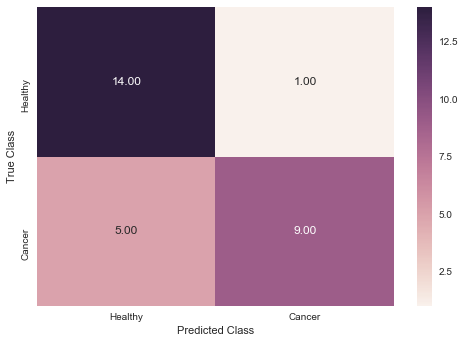

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train) 
Y_pred = nb_model.predict(X_test)

print('train score: '+str(nb_model.score(X_train,Y_train)))
print('test score:  '+str(nb_model.score(X_test,Y_test)))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

### Decision tree model

train score: 1.0
test score:  0.6896551724137931


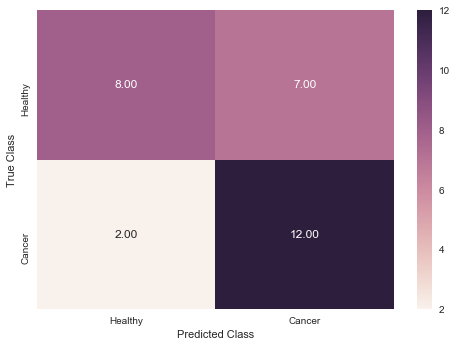

In [67]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_model.fit(X_train, Y_train) 
Y_pred = dt_model.predict(X_test)

print('train score: '+str(dt_model.score(X_train,Y_train)))
print('test score:  '+str(dt_model.score(X_test,Y_test)))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

In [69]:
importances = list(dt_model.feature_importances_)
feature_list = list(data.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('{:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Glucose              Importance: 0.24
BMI                  Importance: 0.23
Age                  Importance: 0.15
Leptin               Importance: 0.11
Resistin             Importance: 0.11
MCP.1                Importance: 0.07
Insulin              Importance: 0.05
Adiponectin          Importance: 0.05
HOMA                 Importance: 0.0


### Extra tree model

train score: 0.8620689655172413
test score:  0.8620689655172413


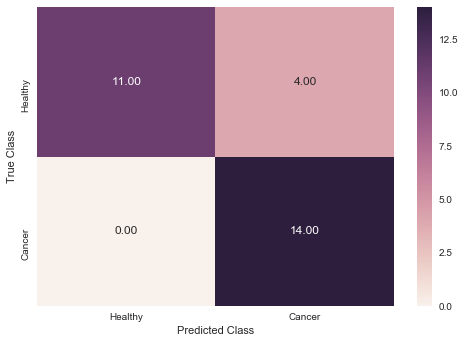

In [103]:
et_model = ExtraTreeClassifier(criterion='entropy', max_features=0.85, min_samples_leaf=3, min_samples_split=9,random_state = 10)
et_model.fit(X_train, Y_train) 
Y_pred = et_model.predict(X_test)

print('train score: '+str(et_model.score(X_train,Y_train)))
print('test score:  '+str(et_model.score(X_test,Y_test)))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

In [70]:
importances = list(et_model.feature_importances_)
feature_list = list(data.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('{:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Glucose              Importance: 0.41
Age                  Importance: 0.2
Resistin             Importance: 0.16
BMI                  Importance: 0.07
Insulin              Importance: 0.05
HOMA                 Importance: 0.05
Leptin               Importance: 0.05
MCP.1                Importance: 0.02
Adiponectin          Importance: 0.0


### Random forest model

train score: 0.9655172413793104
test score:  0.7586206896551724


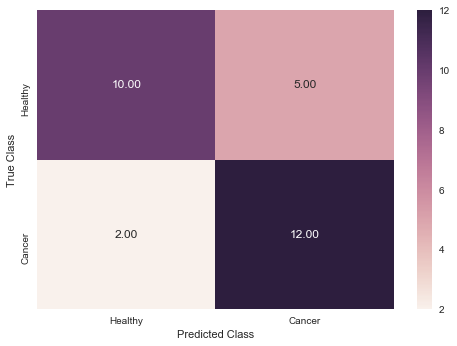

In [105]:
forest_model = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 10)
forest_model.fit(X_train, Y_train) 
Y_pred = forest_model.predict(X_test)

print('train score: '+str(forest_model.score(X_train,Y_train)))
print('test score:  '+str(forest_model.score(X_test,Y_test)))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

In [64]:
importances = list(forest_model.feature_importances_)
feature_list = list(data.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('{:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Glucose              Importance: 0.22
Age                  Importance: 0.18
BMI                  Importance: 0.16
Resistin             Importance: 0.15
Adiponectin          Importance: 0.11
Leptin               Importance: 0.07
Insulin              Importance: 0.06
HOMA                 Importance: 0.03
MCP.1                Importance: 0.02


## Compare model performance

In [58]:
models = pd.DataFrame([['Logistic', logistic_model.score(X_train,Y_train),logistic_model.score(X_test,Y_test)], \
                      ['K Nearest Neighbors', kn_model.score(X_train,Y_train),kn_model.score(X_test,Y_test)], \
                      ['Linear SVM', lsvc_model.score(X_train,Y_train),lsvc_model.score(X_test,Y_test)], \
                      ['Radial SVM', rsvc_model.score(X_train,Y_train),rsvc_model.score(X_test,Y_test)], \
                      ['Naive Bayes', nb_model.score(X_train,Y_train),nb_model.score(X_test,Y_test)], \
                      ['Decision Tree', dt_model.score(X_train,Y_train),dt_model.score(X_test,Y_test)], \
                      ['Extra Tree', et_model.score(X_train,Y_train),et_model.score(X_test,Y_test)], \
                      ['Random Forest', forest_model.score(X_train,Y_train),forest_model.score(X_test,Y_test)]])
models.columns = ['Model', 'Train Score', 'Test Score']

In [60]:
models

,Model,Train Score,Test Score
0,Logistic,0.735632,0.862069
1,K Nearest Neighbors,0.816092,0.793103
2,Linear SVM,0.758621,0.862069
3,Radial SVM,0.862069,0.827586
4,Naive Bayes,0.643678,0.793103
5,Decision Tree,1.000000,0.689655
6,Extra Tree,0.862069,0.862069
7,Random Forest,0.965517,0.758621


Best performers are Logistic, Linear SVM, and Extra Tree. As expected, Glucose is the feature with highest importance for all the decision tree based models.

## 4. Optimize model parameters

### Grid search: Logistic model

In [93]:
logistic_model = LogisticRegression(random_state = 11)

param_grid = {"penalty": ['l1', 'l2'],
              "C": [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(logistic_model, param_grid=param_grid, cv=5, iid=False,return_train_score=True)
grid_search.fit(X_train, Y_train.values.ravel())

print(grid_search.best_params_)

grid_scores = pd.DataFrame(grid_search.cv_results_)
print(grid_scores[grid_scores.rank_test_score == 1].mean_test_score)

{'C': 1, 'penalty': 'l1'}
6    0.677778
Name: mean_test_score, dtype: float64


train score: 0.7816091954022989
test score:  0.8620689655172413
             precision    recall  f1-score   support

          1       0.92      0.80      0.86        15
          2       0.81      0.93      0.87        14

avg / total       0.87      0.86      0.86        29



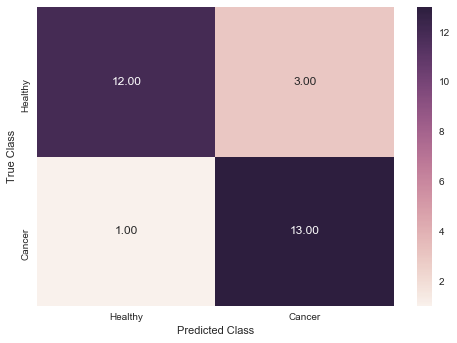

In [17]:
logistic_model = LogisticRegression(random_state = 10, C=1, penalty='l1')
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_test)

print('train score: '+str(logistic_model.score(X_train,Y_train)))
print('test score:  '+str(logistic_model.score(X_test,Y_test)))
print(classification_report(Y_test,Y_pred))

cm_lm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm_lm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

### Grid search: Linear SVM

In [96]:
lsvc_model = SVC(kernel = 'linear', random_state = 10)

param_grid = {"C": [0.01,0.05,0.1, 0.5, 1, 5, 10, 50],
              "gamma": [0.001, 0.01, 0.1, 'auto']}

grid_search = GridSearchCV(lsvc_model, param_grid=param_grid, cv=5, iid=False,return_train_score=True)
grid_search.fit(X_train, Y_train.values.ravel())

print(grid_search.best_params_)

grid_scores = pd.DataFrame(grid_search.cv_results_)
print(grid_scores[grid_scores.rank_test_score == 1].mean_test_score)

{'C': 50, 'gamma': 0.001}
28    0.656863
29    0.656863
30    0.656863
31    0.656863
Name: mean_test_score, dtype: float64


train score: 0.7701149425287356
test score:  0.8275862068965517
             precision    recall  f1-score   support

          1       0.81      0.87      0.84        15
          2       0.85      0.79      0.81        14

avg / total       0.83      0.83      0.83        29



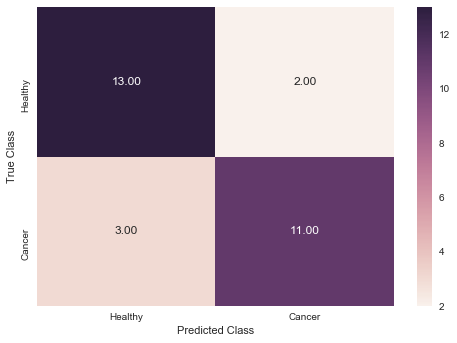

In [15]:
lsvc_model = SVC(kernel = 'linear', random_state = 10, C = 50, gamma = 0.001)
lsvc_model.fit(X_train, Y_train) 
Y_pred = lsvc_model.predict(X_test)

print('train score: '+str(lsvc_model.score(X_train,Y_train)))
print('test score:  '+str(lsvc_model.score(X_test,Y_test)))
print(classification_report(Y_test,Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

### Grid search: Extra Tree

In [107]:
et_model = ExtraTreeClassifier(criterion='entropy', max_features=0.85, min_samples_leaf=3, min_samples_split=9,random_state = 10)

param_grid = {"criterion": ['gini', 'entropy'],
              "max_features": np.arange(0.1,0.9,0.05),
              "min_samples_leaf": np.arange(2,10,1),
              "min_samples_split": np.arange(2,20,1)}

grid_search = GridSearchCV(et_model, param_grid=param_grid, cv=5, iid=False,return_train_score=True)
grid_search.fit(X_train, Y_train.values.ravel())

print(grid_search.best_params_)

grid_scores = pd.DataFrame(grid_search.cv_results_)
print(grid_scores[grid_scores.rank_test_score == 1].mean_test_score.head(5))

{'min_samples_split': 2, 'max_features': 0.3500000000000001, 'min_samples_leaf': 8, 'criterion': 'gini'}
828    0.75817
829    0.75817
830    0.75817
831    0.75817
832    0.75817
Name: mean_test_score, dtype: float64


train score: 0.7586206896551724
test score:  0.7931034482758621
             precision    recall  f1-score   support

          1       1.00      0.60      0.75        15
          2       0.70      1.00      0.82        14

avg / total       0.86      0.79      0.79        29



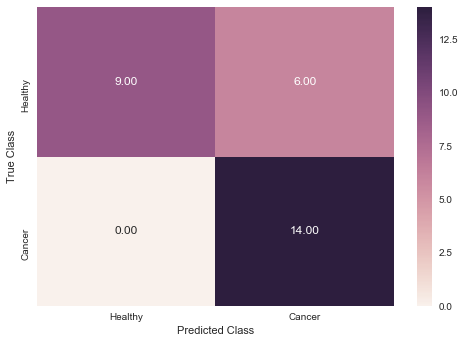

In [16]:
et_model = ExtraTreeClassifier(criterion='gini', max_features=0.35, min_samples_leaf=8, min_samples_split=2,random_state = 10)
et_model.fit(X_train, Y_train) 
Y_pred = et_model.predict(X_test)

print('train score: '+str(et_model.score(X_train,Y_train)))
print('test score:  '+str(et_model.score(X_test,Y_test)))
print(classification_report(Y_test,Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

No real improvement with Grid Search.

### AutoML with TPOT

In [8]:
tpot = TPOTClassifier(generations=10, cv=5,random_state=10, verbosity=2)
tpot.fit(X_train, Y_train)
tpot.score(X_test, Y_test)

Y_pred = tpot.predict(X_test)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


Generation 1 - Current best internal CV score: 0.7607843137254902
Generation 2 - Current best internal CV score: 0.7607843137254902
Generation 3 - Current best internal CV score: 0.7607843137254902
Generation 4 - Current best internal CV score: 0.7941176470588236
Generation 5 - Current best internal CV score: 0.7941176470588236
Generation 6 - Current best internal CV score: 0.7947712418300653
Generation 7 - Current best internal CV score: 0.7947712418300653
Generation 8 - Current best internal CV score: 0.7947712418300653
Generation 9 - Current best internal CV score: 0.7947712418300653
Generation 10 - Current best internal CV score: 0.7947712418300653

Best pipeline: ExtraTreesClassifier(PolynomialFeatures(StandardScaler(input_matrix), degree=2, include_bias=False, interaction_only=False), bootstrap=False, criterion=entropy, max_features=0.55, min_samples_leaf=7, min_samples_split=3, n_estimators=100)


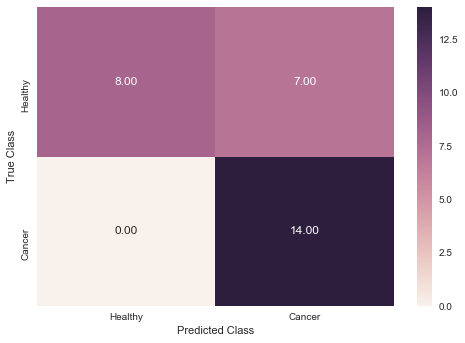

In [10]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

In [12]:
print('accuracy: '+str(accuracy_score(Y_test, Y_pred)))
print(classification_report(Y_test,Y_pred))

accuracy: 0.7586206896551724
             precision    recall  f1-score   support

          1       1.00      0.53      0.70        15
          2       0.67      1.00      0.80        14

avg / total       0.84      0.76      0.75        29



No improvement with TPOT.

# 5. Conclusion
The best-performing model was Logistic Regression, with sensitivity and specificity of 83%. The top predictive features were Glucose, Age, Resistin, BMI, and Insulin. These results indicate that there is some relationship between obesity/metabolic disregulation and breast cancer, and that this model may be used as a biomarker of breast cancer.